### Download file

In [1]:
link = "https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/-/raw/promise12/label_train00.npy"
# Download the file
!wget -O label_train00.npy $link

--2022-12-20 11:33:10--  https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/-/raw/promise12/label_train00.npy
Resolving weisslab.cs.ucl.ac.uk (weisslab.cs.ucl.ac.uk)... 128.16.4.22
Connecting to weisslab.cs.ucl.ac.uk (weisslab.cs.ucl.ac.uk)|128.16.4.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524368 (512K) [application/octet-stream]
Saving to: ‘label_train00.npy’

label_train00.npy   100%[===================>] 512.08K  1.33MB/s    in 0.4s    

2022-12-20 11:33:11 (1.33 MB/s) - ‘label_train00.npy’ saved [524368/524368]



### Load the segmentation file

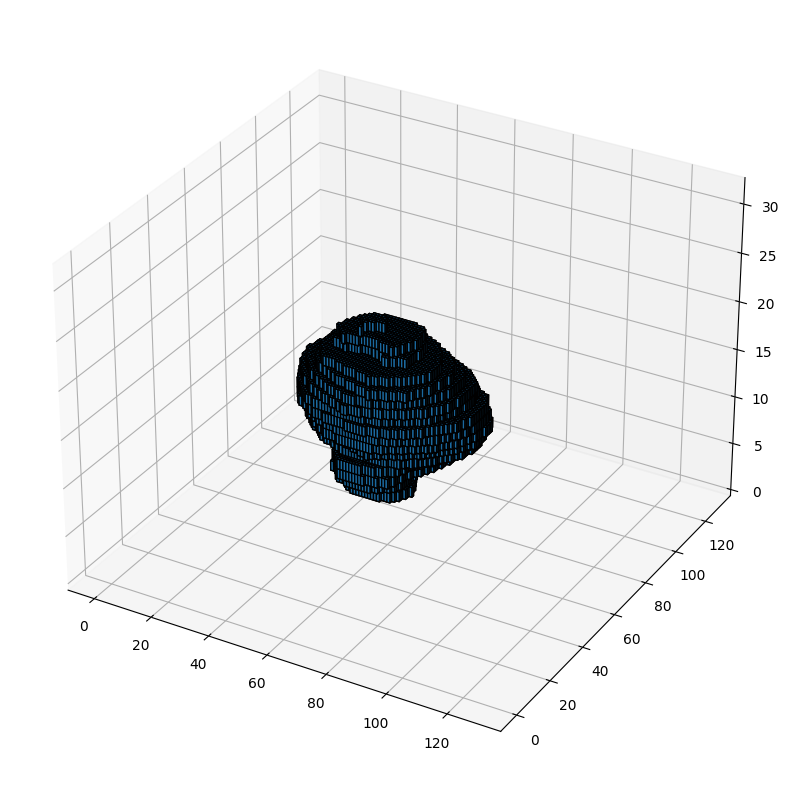

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from skimage import measure

# Load the data
label_train00 = np.load('label_train00.npy').T

# Visualise the data: 3D array with 128 rows, 128 columns and P slices
# Visualize 3D array
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(label_train00, edgecolor='k')
plt.show()

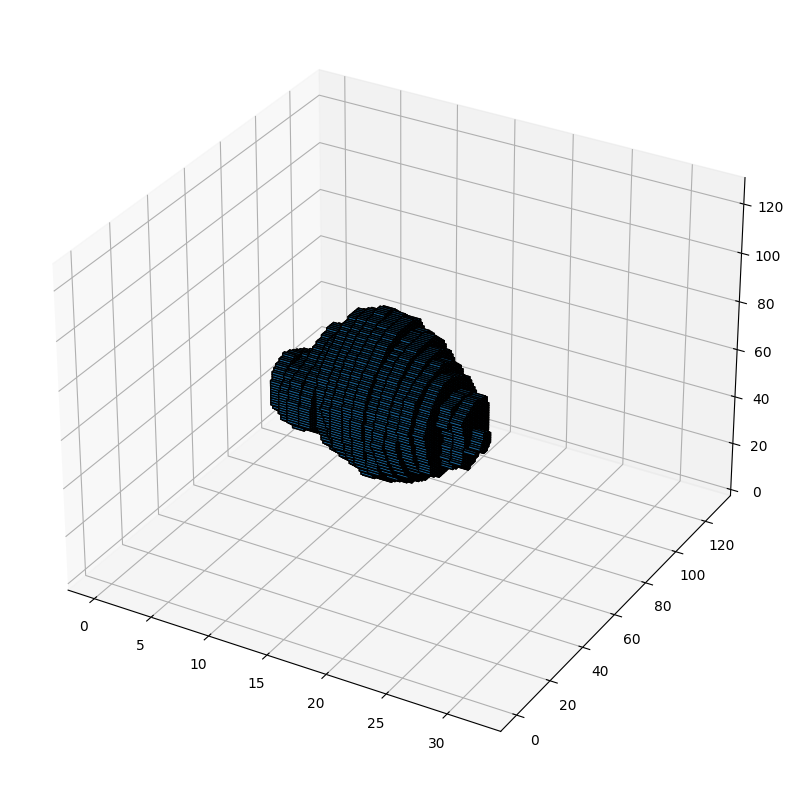

In [32]:
32*128*128


524288

### Use skimage.measue.marching_cubes algorithim to compute vertex coordinates in mm and triangles for representing the segmentation boundary

Marching Cubes is an algorithm that can be used to extract a triangular mesh surface from a 3D image volume. 

In [2]:
# Use marching cubes to obtain the vertex coordinates in mm and triangles
vertices, triangles, _, _ = measure.marching_cubes(label_train00, 0)

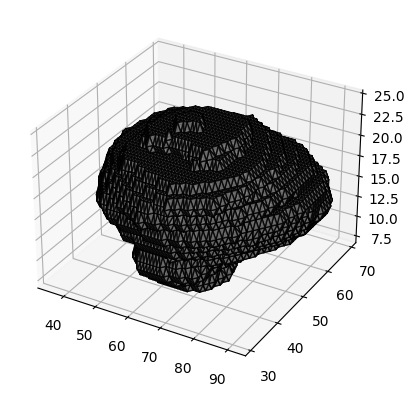

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Extract the vertex coordinates and triangle faces of the mesh
vertices, faces, _, _ = measure.marching_cubes(label_train00, 0)

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a Poly3DCollection with the triangle faces
mesh = Poly3DCollection(vertices[faces], alpha=0.8, edgecolor='k')
mesh.set_facecolor((0.5, 0.5, 0.5))

# Add the mesh to the axes
ax.add_collection(mesh)

# Set the axis limits
ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())
ax.set_zlim(vertices[:, 2].min(), vertices[:, 2].max())

# Show the plot
plt.show()


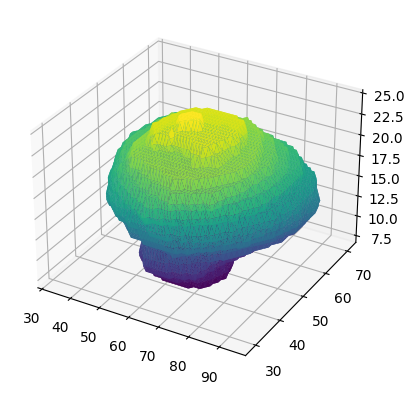

In [12]:
# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangle faces
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=triangles, alpha = 1, cmap='viridis')

# Show the plot
plt.show()

In [24]:
vertices[:,0].min(); vertices[:, 0].max()


94.0

In [14]:
triangles[0]

array([2, 1, 0], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices[triangles])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

plt.tight_layout()
plt.show()

In [2]:
import visvis as vv
verts, faces, normals, values = measure.marching_cubes(label_train00, 0)
vv.mesh(np.fliplr(verts), faces, normals, values)
vv.use().Run()

: 

: 